In [1]:
# Importing pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
csv_file_path = "result_user_eval_CLEAN.csv"  # Adjust the file path if needed
df = pd.read_csv(csv_file_path)

In [3]:
df.head()

,Sec-Ch-Ua,Sec-Ch-Ua-Platform,User-Agent,name,start_id,t0_correct,t0_selected_time,t0_tot,t1_correct,t1_selected_time,t1_tot,timestamp_quiz_start,design_preference,optional_reason,time_selection_preference,keyboard_usage,preferred_way_to_fill
0,"""Microsoft Edge"";v=""119"", ""Chromium"";v=""119"", ...","""Windows""",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,John,0,False,11:15:00,23.603187,True,11:15,2.593805,1.701863e+09,B,Less clicks,B,No,Multiple Choice Timetable
1,"""Google Chrome"";v=""119"", ""Chromium"";v=""119"", ""...","""macOS""",Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Artthik,1,True,11:15,4.547278,True,11:15,3.481699,1.701908e+09,B,Structured and logical positioning,B,Yes,Multiple Choice Timetable
2,NaN,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,Alexandre,0,True,11:15,7.424505,True,11:15,3.544414,1.701939e+09,A,Easier to use,A,Yes,Scrollable List
3,NaN,NaN,Mozilla/5.0 (Android 12; Mobile; rv:109.0) Gec...,Yann,1,True,11:15,9.772329,True,11:15,8.526210,1.701939e+09,B,Le time picking d'android est mauvais. D'aille...,B,No,Typing Numbers
4,NaN,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Anonymous,0,True,11:15,9.469560,True,11:15,7.010499,1.701939e+09,A,B was visually overwhelming.. It would allow t...,A,Yes,Typing Numbers


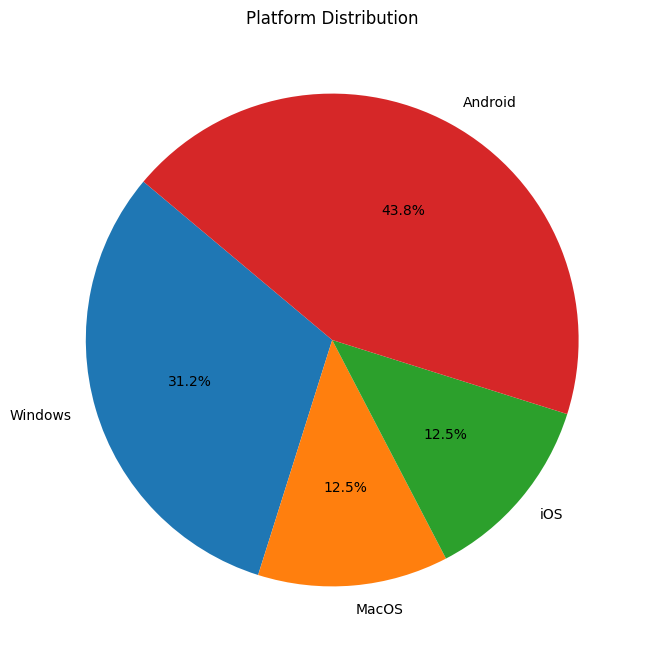

In [4]:
# Manual platform analysis
platform_counts = {'Windows': 5, 'MacOS': 2, 'iOS': 2, 'Android': 7}

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts.values(), labels=platform_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Platform Distribution')
plt.show()

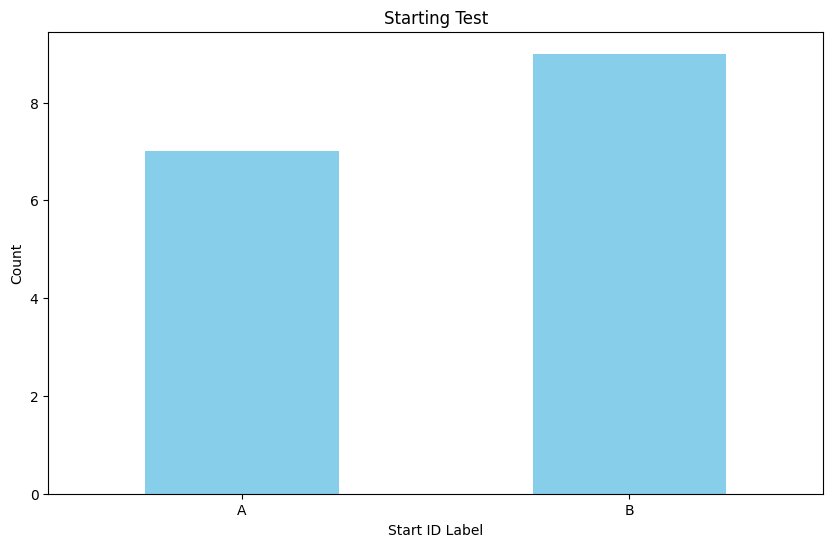

In [5]:
# Mapping start_id labels
start_id_labels = {0: 'A', 1: 'B'}

# Mapping start_id to labels
df['start_id_label'] = df['start_id'].map(start_id_labels)

# Plotting a bar plot
plt.figure(figsize=(10, 6))
df['start_id_label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Starting Test')
plt.xlabel('Start ID Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

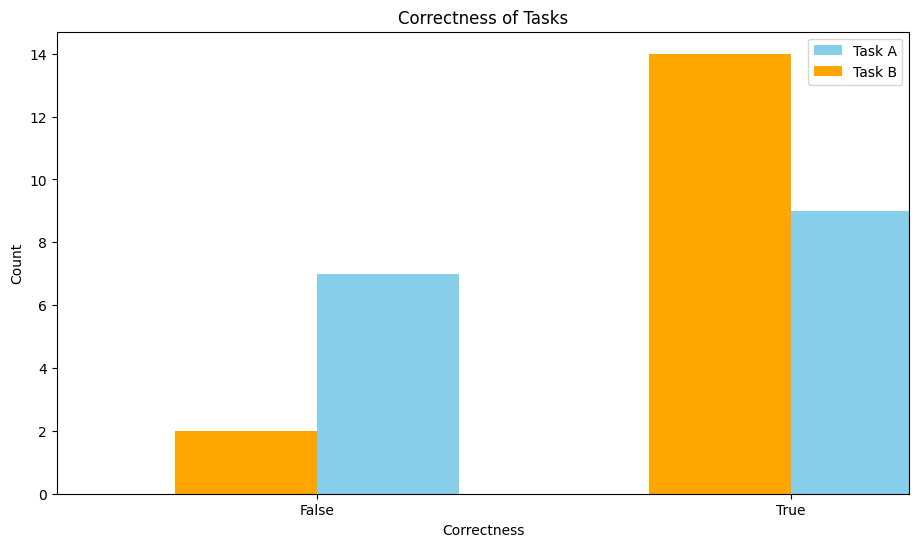

In [6]:
import matplotlib.pyplot as plt

# Plotting a bar chart for t0_correct and t1_correct with adjusted bar width
plt.figure(figsize=(11, 6))

df['t0_correct'].value_counts().sort_index().plot(kind='bar', position=0, width=0.3, label='Task A', color='skyblue')
df['t1_correct'].value_counts().sort_index().plot(kind='bar', position=1, width=0.3, label='Task B', color='orange')

plt.title('Correctness of Tasks')
plt.xlabel('Correctness')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()

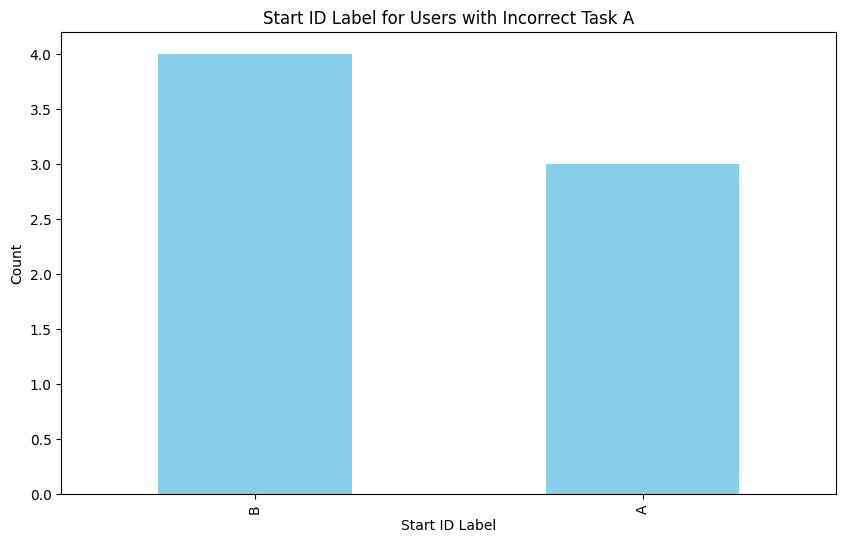

In [7]:
# Filter data for users where t0_correct is False
incorrect_t0_users = df[df['t0_correct'] == False]

# Count the occurrences of each 'start_id_label'
label_counts = incorrect_t0_users['start_id_label'].value_counts()

# Plotting a bar plot for start_id_label
plt.figure(figsize=(10, 6))

label_counts.plot(kind='bar', color='skyblue')

plt.title('Start ID Label for Users with Incorrect Task A')
plt.xlabel('Start ID Label')
plt.ylabel('Count')

plt.show()

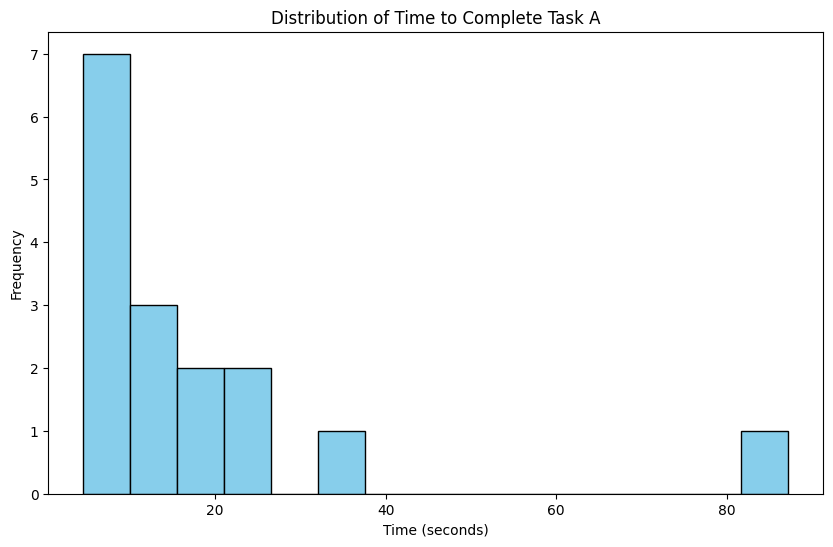

In [8]:
# Plotting a histogram for t0_tot
plt.figure(figsize=(10, 6))

plt.hist(df['t0_tot'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Time to Complete Task A')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.show()

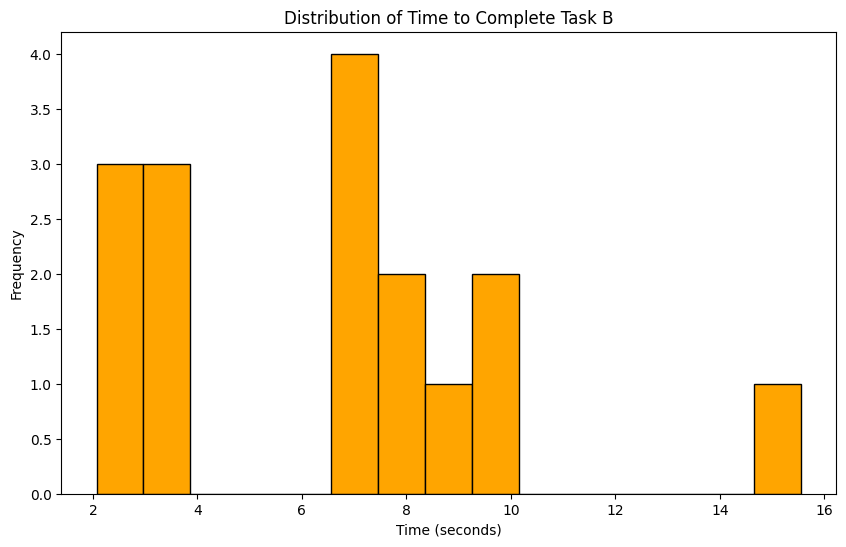

In [9]:
# Plotting a histogram for t1_tot
plt.figure(figsize=(10, 6))

plt.hist(df['t1_tot'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Time to Complete Task B')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.show()

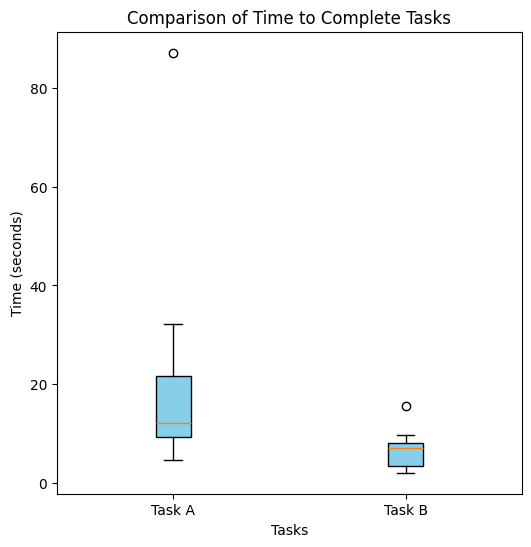

In [10]:
# Plotting a side-by-side boxplot for t0_tot and t1_tot
plt.figure(figsize=(6, 6))

plt.boxplot([df['t0_tot'], df['t1_tot']], labels=['Task A', 'Task B'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Comparison of Time to Complete Tasks')
plt.xlabel('Tasks')
plt.ylabel('Time (seconds)')

plt.show()

In [11]:
## General statistics for time:

mean_t0 = df['t0_tot'].mean()
mean_t1 = df['t1_tot'].mean()

median_t0 = df['t0_tot'].median()
median_t1 = df['t1_tot'].median()

std_dev_t0 = df['t0_tot'].std()
std_dev_t1 = df['t1_tot'].std()

min_t0 = df['t0_tot'].min()
max_t0 = df['t0_tot'].max()

min_t1 = df['t1_tot'].min()
max_t1 = df['t1_tot'].max()

q1_t0 = df['t0_tot'].quantile(0.25)
q3_t0 = df['t0_tot'].quantile(0.75)
iqr_t0 = q3_t0 - q1_t0

q1_t1 = df['t1_tot'].quantile(0.25)
q3_t1 = df['t1_tot'].quantile(0.75)
iqr_t1 = q3_t1 - q1_t1


In [12]:
# Basic statistics for t0_tot
print("Statistics for t0_tot:")
print(f"Mean: {df['t0_tot'].mean()}")
print(f"Median: {df['t0_tot'].median()}")
print(f"Standard Deviation: {df['t0_tot'].std()}")
print(f"Minimum: {df['t0_tot'].min()}")
print(f"Maximum: {df['t0_tot'].max()}")
print(f"Q1 (25th Percentile): {df['t0_tot'].quantile(0.25)}")
print(f"Q3 (75th Percentile): {df['t0_tot'].quantile(0.75)}")
print(f"IQR (Interquartile Range): {df['t0_tot'].quantile(0.75) - df['t0_tot'].quantile(0.25)}")
print()

# Basic statistics for t1_tot
print("Statistics for t1_tot:")
print(f"Mean: {df['t1_tot'].mean()}")
print(f"Median: {df['t1_tot'].median()}")
print(f"Standard Deviation: {df['t1_tot'].std()}")
print(f"Minimum: {df['t1_tot'].min()}")
print(f"Maximum: {df['t1_tot'].max()}")
print(f"Q1 (25th Percentile): {df['t1_tot'].quantile(0.25)}")
print(f"Q3 (75th Percentile): {df['t1_tot'].quantile(0.75)}")
print(f"IQR (Interquartile Range): {df['t1_tot'].quantile(0.75) - df['t1_tot'].quantile(0.25)}")


Statistics for t0_tot:
Mean: 19.023966550827026
Median: 12.139862060546875
Standard Deviation: 19.70073532206923
Minimum: 4.547278165817261
Maximum: 87.15759134292603
Q1 (25th Percentile): 9.402172923088074
Q3 (75th Percentile): 21.564119637012478
IQR (Interquartile Range): 12.161946713924404

Statistics for t1_tot:
Mean: 6.496555358171463
Median: 6.995103478431702
Standard Deviation: 3.5850258874448717
Minimum: 2.067539930343628
Maximum: 15.55553936958313
Q1 (25th Percentile): 3.3572340607643127
Q3 (75th Percentile): 8.181419849395752
IQR (Interquartile Range): 4.824185788631439


In [13]:
from scipy.stats import ttest_ind

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(df['t0_tot'], df['t1_tot'])
print(f"t_stat: {t_stat}")
print(f"p_value: {p_value}")

t_stat: 2.5024455402042296
p_value: 0.01801292632293625


In [14]:
# This test is less relevant as users did both test A and B. Better use the paired sample t-test below.
# The t-statistic is a measure of how many standard errors the means are apart.
# A positive val indicates that T0 is greater (longer) by 2.5 standard errors

# A small p-value (typically < 0.05) would lead to rejecting the null hypothesis, indicating a significant difference.
# Here there is a significant difference between A and B. B is much faster.

In [15]:
from scipy.stats import ttest_rel

# Perform paired sample t-test
t_stat, p_value = ttest_rel(df['t0_tot'], df['t1_tot'])
print(f"t_stat: {t_stat}")
print(f"p_value: {p_value}")

t_stat: 2.5793412643907647
p_value: 0.020942074685181097


In [16]:
# Same analysis as before. There is a significant difference between A and B

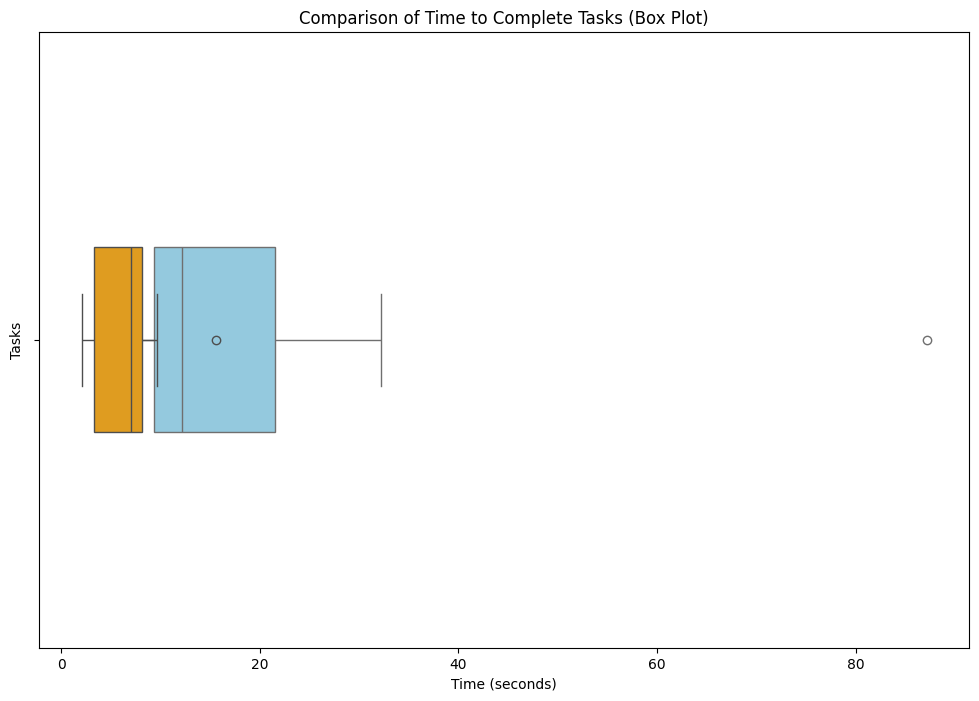

In [17]:
import seaborn as sns

# Plotting a box plot for t0_tot and t1_tot
plt.figure(figsize=(12, 8))

sns.boxplot(x=df['t0_tot'], color='skyblue', width=0.3, legend="full")
sns.boxplot(x=df['t1_tot'], color='orange', width=0.3, legend="full")

plt.title('Comparison of Time to Complete Tasks (Box Plot)')
plt.xlabel('Time (seconds)')
plt.ylabel('Tasks')

plt.show()

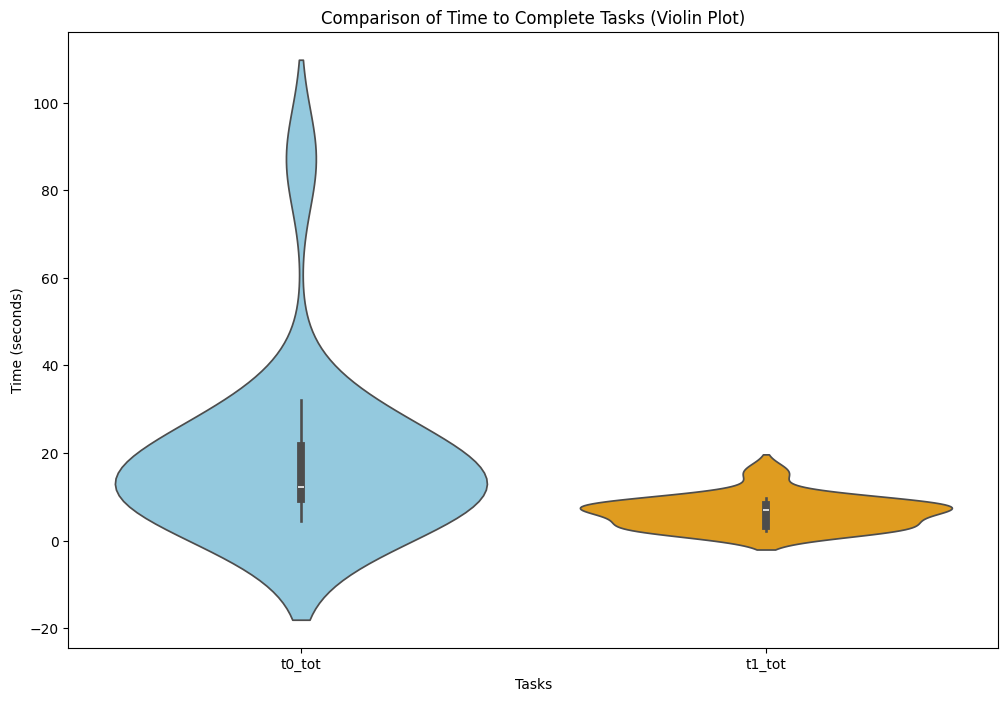

In [18]:

# Plotting a violin plot for t0_tot and t1_tot
plt.figure(figsize=(12, 8))

sns.violinplot(data=df[['t0_tot', 't1_tot']], palette=['skyblue', 'orange'])
plt.title('Comparison of Time to Complete Tasks (Violin Plot)')
plt.xlabel('Tasks')
plt.ylabel('Time (seconds)')

plt.show()

C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\755478419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='design_preference', data=df, palette='viridis')


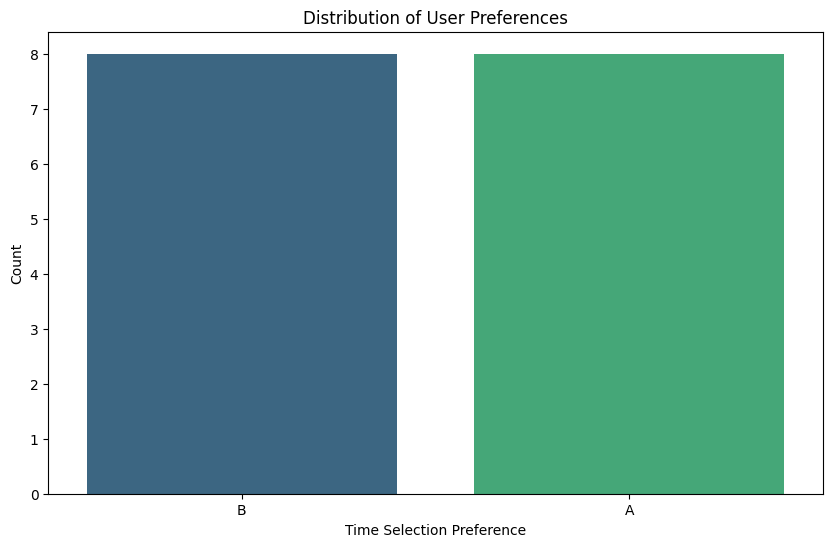

In [19]:
# Plotting a bar plot for user preferences
plt.figure(figsize=(10, 6))

sns.countplot(x='design_preference', data=df, palette='viridis')

plt.title('Distribution of User Preferences')
plt.xlabel('Time Selection Preference')
plt.ylabel('Count')

plt.show()

In [20]:
# List of optional reasons for users who chose A
optional_reasons_A = df[df['design_preference'] == 'A']['optional_reason'].tolist()

# List of optional reasons for users who chose B
optional_reasons_B = df[df['design_preference'] == 'B']['optional_reason'].tolist()

# Print the lists
print("Optional Reasons for Users who chose A:")
for reason in optional_reasons_A:
    print(reason)
print("\nOptional Reasons for Users who chose B:")
for reason in optional_reasons_B:
    print(reason)

Optional Reasons for Users who chose A:
Easier to use
B was visually overwhelming.. It would allow to see which slots are available/unavailable, which could be useful.
Not viewing an ugly table with a tsunami of informations. But you have to think a little more with A on mobile
nan
nan
nan
nan
nan

Optional Reasons for Users who chose B:
Less clicks
Structured and logical positioning
Le time picking d'android est mauvais. D'ailleurs je crois que j'ai choisi 11am au lieu de 11pm
I can read easilly
Less interactions
nan
nan
nan


C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\1237134809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_A_users['unique_id'] = range(1, len(design_A_users) + 1)
C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\1237134809.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_difference', y='unique_id', data=design_A_users, ci=None, palette='viridis', orient='h')
C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\1237134809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_difference

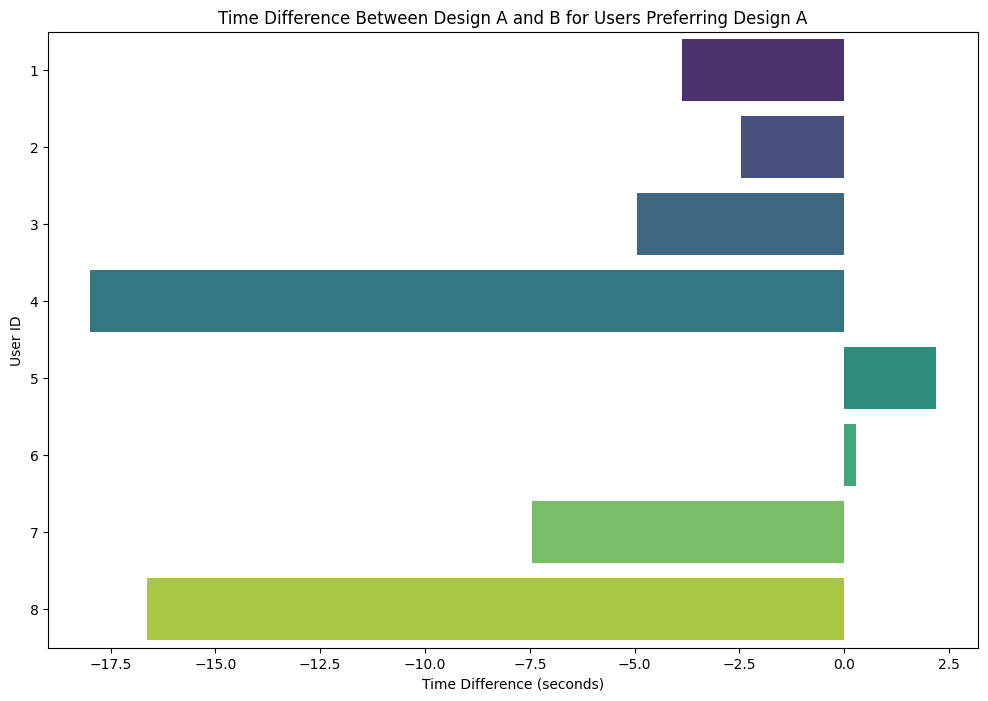

In [21]:

# Create a new column for the time difference
df['time_difference'] = df['t1_tot'] - df['t0_tot']

# Filter data for users who prefer design A
design_A_users = df[df['design_preference'] == 'A']

# Add a unique ID column
design_A_users['unique_id'] = range(1, len(design_A_users) + 1)

# Plotting a horizontal bar plot for time difference
plt.figure(figsize=(12, 8))

sns.barplot(x='time_difference', y='unique_id', data=design_A_users, ci=None, palette='viridis', orient='h')

plt.title('Time Difference Between Design A and B for Users Preferring Design A')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('User ID')

plt.show()



C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\2361436651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_B_users['unique_id'] = range(1, len(design_B_users) + 1)
C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\2361436651.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_difference', y='unique_id', data=design_B_users, ci=None, palette='viridis', orient='h')
C:\Users\jeanmari.alder\AppData\Local\Temp\ipykernel_4832\2361436651.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_difference

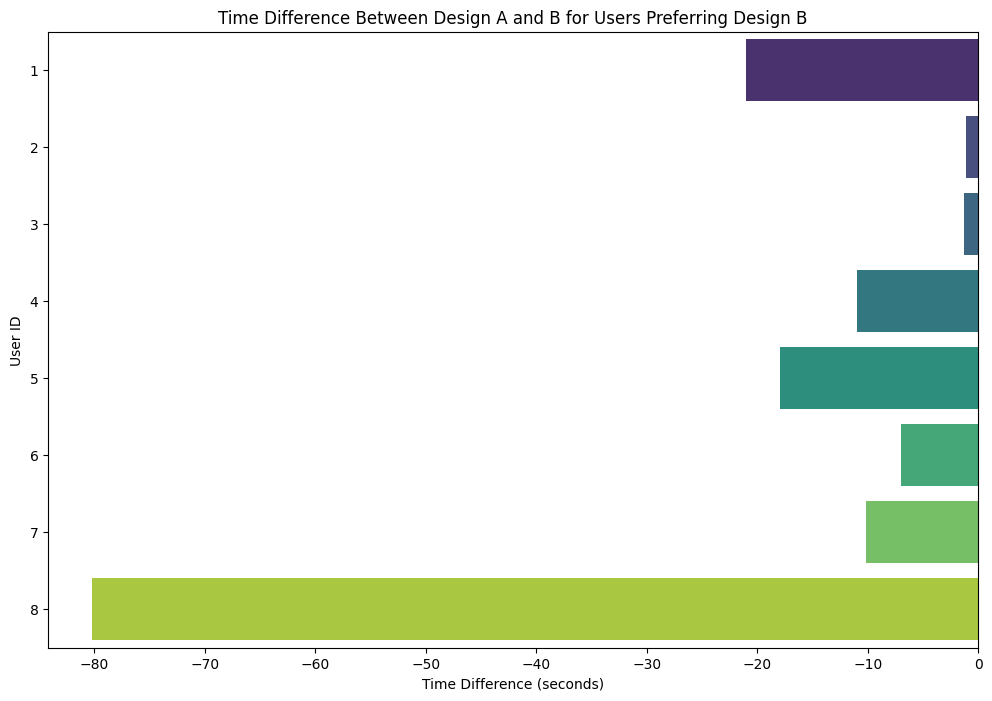

In [22]:
# Create a new column for the time difference
df['time_difference'] = df['t1_tot'] - df['t0_tot']

# Filter data for users who prefer design A
design_B_users = df[df['design_preference'] == 'B']

# Add a unique ID column
design_B_users['unique_id'] = range(1, len(design_B_users) + 1)

# Plotting a horizontal bar plot for time difference
plt.figure(figsize=(12, 8))

sns.barplot(x='time_difference', y='unique_id', data=design_B_users, ci=None, palette='viridis', orient='h')

plt.title('Time Difference Between Design A and B for Users Preferring Design B')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('User ID')

plt.show()


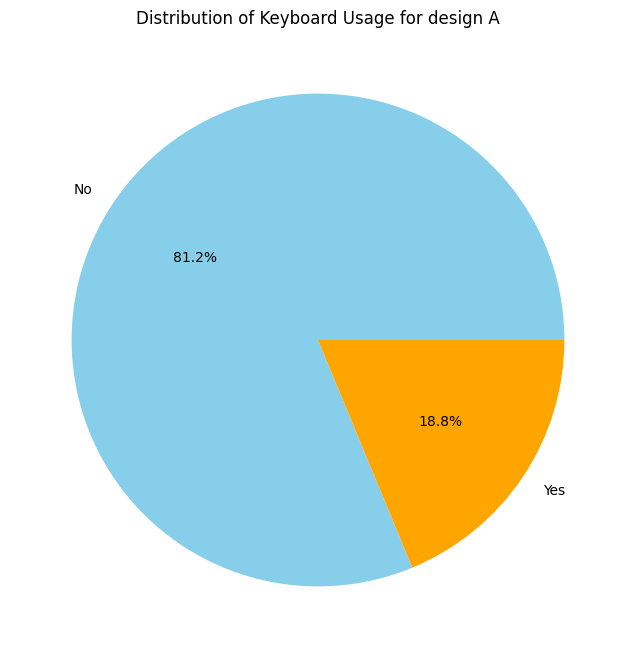

In [24]:
# Count the occurrences of each keyboard usage value
keyboard_counts = df['keyboard_usage'].value_counts()

# Plotting a pie chart for keyboard usage
plt.figure(figsize=(8, 8))

plt.pie(keyboard_counts, labels=keyboard_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])

plt.title('Distribution of Keyboard Usage for design A')
plt.show()

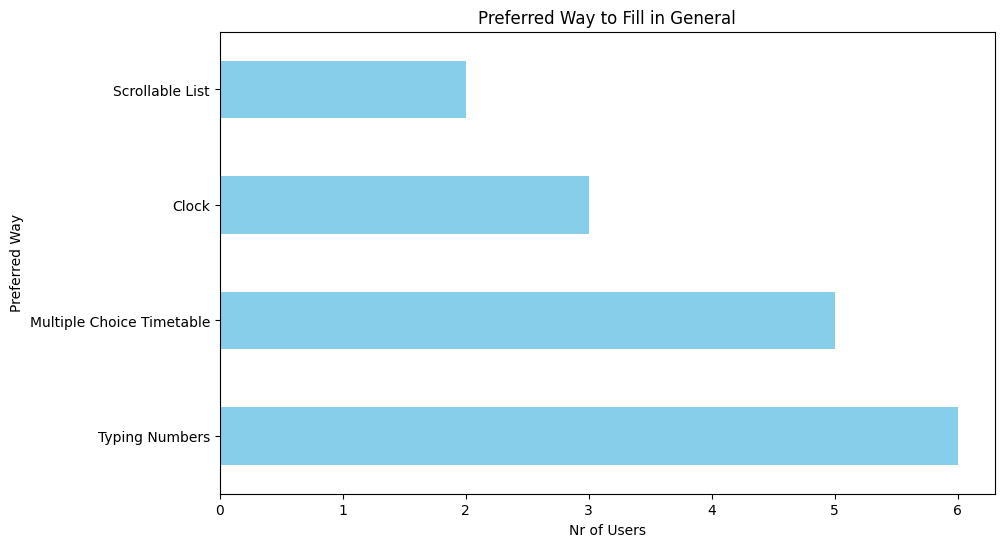

In [29]:
# Count the occurrences of each preferred way to fill value
preferred_way_counts = df['preferred_way_to_fill'].value_counts()

# Plotting a horizontal bar plot for preferred way to fill
plt.figure(figsize=(10, 6))

preferred_way_counts.plot(kind='barh', color='skyblue')

plt.title('Preferred Way to Fill in General')
plt.xlabel('Nr of Users')
plt.ylabel('Preferred Way')

plt.show()

<Figure size 1000x600 with 0 Axes>

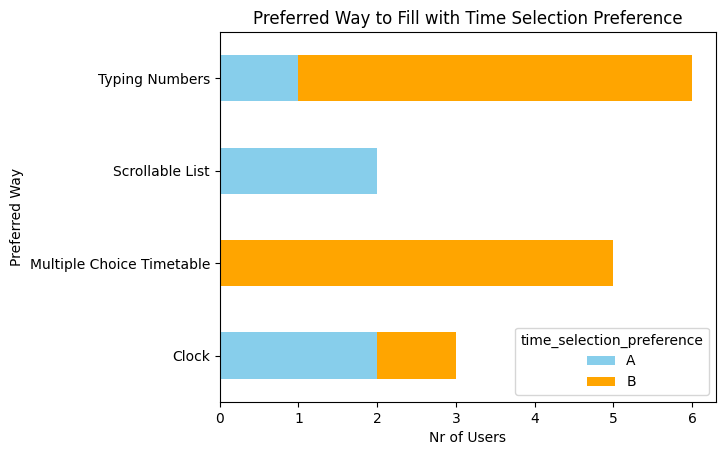

In [28]:
# Create a new column for the time difference
df['time_difference'] = df['t1_tot'] - df['t0_tot']

# Count the occurrences of each preferred way to fill value and time selection preference
count_df = df.groupby(['preferred_way_to_fill', 'time_selection_preference']).size().unstack()

# Plotting a horizontal bar plot with two colors
plt.figure(figsize=(10, 6))

count_df.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])

plt.title('Preferred Way to Fill with Time Selection Preference')
plt.xlabel('Nr of Users')
plt.ylabel('Preferred Way')

plt.show()